In [1]:
import numpy  as np
import cv2 
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

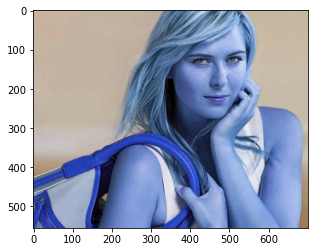

In [2]:
img = cv2.imread('C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Test_images/sharapova1.jpg')
plt.imshow(img)

In [3]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

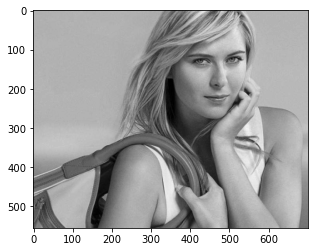

In [4]:
plt.imshow(gray, cmap='gray')

In [5]:
face_cascade = cv2.CascadeClassifier('C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/OpenCV/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/OpenCV/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[352,  38, 233, 233]])

In [6]:
(x,y,w,h) = faces[0]
x,y,w,h

(352, 38, 233, 233)

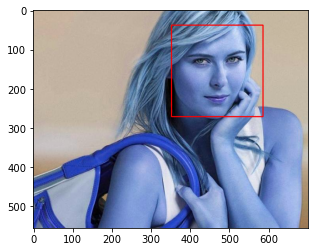

In [7]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

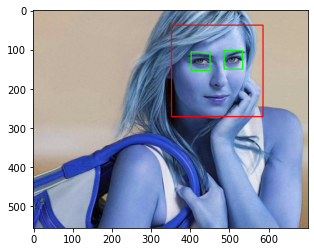

In [8]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

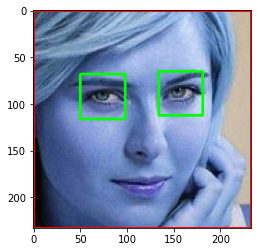

In [9]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [10]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

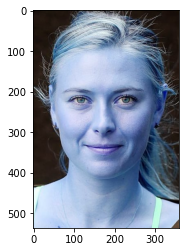

In [12]:
original_image = cv2.imread('C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Test_images/Maria.jpg')
plt.imshow(original_image)

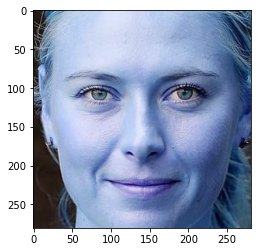

In [13]:

cropped_image = get_cropped_image_if_2_eyes('C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Test_images/Maria.jpg')
plt.imshow(cropped_image)

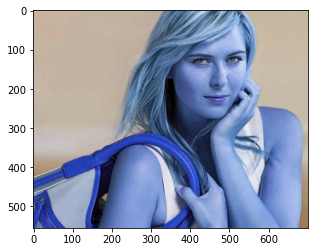

In [14]:
org_image_obstructed = cv2.imread('C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Test_images/Sharapova1.jpg')
plt.imshow(org_image_obstructed)

In [15]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Test_images/Sharapova1.jpg')
cropped_image_no_2_eyes

array([[[ 84, 105, 126],
        [ 66,  86, 104],
        [ 50,  69,  90],
        ...,
        [199, 185, 162],
        [199, 185, 162],
        [199, 185, 162]],

       [[ 73,  93, 111],
        [ 53,  73,  91],
        [ 41,  60,  81],
        ...,
        [199, 185, 162],
        [199, 185, 162],
        [198, 184, 161]],

       [[ 68,  88, 106],
        [ 52,  69,  88],
        [ 45,  64,  85],
        ...,
        [200, 186, 163],
        [200, 186, 163],
        [201, 187, 164]],

       ...,

       [[ 10,   6,  11],
        [  5,   2,   4],
        [  0,   0,   1],
        ...,
        [109, 128, 185],
        [102, 123, 184],
        [105, 127, 193]],

       [[  9,   5,  10],
        [  4,   1,   3],
        [  0,   0,   1],
        ...,
        [110, 130, 185],
        [102, 123, 184],
        [106, 128, 194]],

       [[  8,   4,   9],
        [  2,   0,   1],
        [  0,   0,   1],
        ...,
        [112, 132, 187],
        [101, 122, 183],
        [105, 127, 193]]

In [16]:

path_to_data = "C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/"
path_to_cr_data = "C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped/"

In [17]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped',
 'C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/lionel_messi',
 'C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/maria_sharapova',
 'C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/muhammad_salah',
 'C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/rone_coleman',
 'C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/The_rock']

In [26]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [27]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

cropped
lionel_messi
Generating cropped images in folder:  C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped/maria_sharapova
muhammad_salah
Generating cropped images in folder:  C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped/muhammad_salah
rone_coleman
Generating cropped images in folder:  C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped/rone_coleman
The_rock
Generating cropped images in folder:  C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped/The_rock


In [28]:
cropped_img = np.array(roi_color)
cropped_img.shape

(128, 128, 3)

In [29]:
##(3) Preprocessing: Use wavelet transform as a feature for traning our model In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc---Wavelet transform

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H


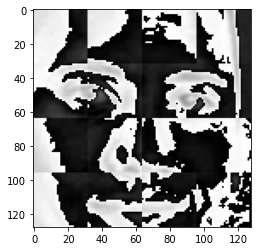

In [30]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [31]:
##You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier
##(3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region
##Lets write a python function that can take input image and returns cropped image (if face and eyes >=2 are detected)

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

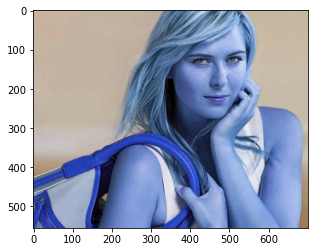

In [32]:
original_image = cv2.imread('C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Test_images/sharapova1.jpg')
plt.imshow(original_image)

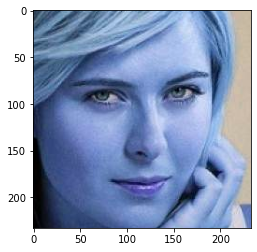

In [33]:
cropped_image = get_cropped_image_if_2_eyes('C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Test_images/sharapova1.jpg')
plt.imshow(cropped_image)

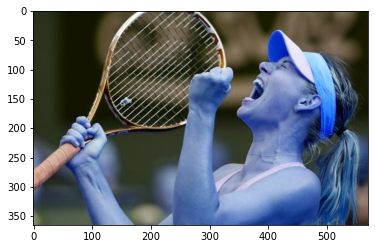

In [34]:
##In below image face is not very clear and it doesn't have two eyes clearly visible
org_image_obstructed = cv2.imread('C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Test_images/sharapova2.jpg')
plt.imshow(org_image_obstructed)

In [35]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Test_images/sharapova2.jpg')
cropped_image_no_2_eyes

In [38]:
##Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training
path_to_data = "C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/"
path_to_cr_data = "C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped/"

In [39]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [40]:
img_dirs

['C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped',
 'C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/lionel_messi',
 'C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/maria_sharapova',
 'C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/muhammad_salah',
 'C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/rone_coleman',
 'C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/The_rock']

In [41]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [42]:
ropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped/lionel_messi
Generating cropped images in folder:  C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped/maria_sharapova
Generating cropped images in folder:  C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped/muhammad_salah
Generating cropped images in folder:  C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped/rone_coleman
Generating cropped images in folder:  C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped/The_rock


In [43]:
##Now you should have cropped folder under datasets folder that contains cropped images
##Manually examine cropped folder and delete any unwanted images
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped/lionel_messi\\lionel_messi1.png',
  'C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped/lionel_messi\\lionel_messi10.png',
  'C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped/lionel_messi\\lionel_messi11.png',
  'C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped/lionel_messi\\lionel_messi12.png',
  'C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped/lionel_messi\\lionel_messi13.png',
  'C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped/lionel_messi\\lionel_messi14.png',
  'C:/Users/anass/Desktop/Files/DataScentist/Projects/Project9_ML-FaceRecognition/Model/Dataset/cropped/lionel_messi\\lionel_messi15.png',
  'C:/Users/

In [44]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'muhammad_salah': 2,
 'rone_coleman': 3,
 'The_rock': 4}

In [45]:
##mages in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [46]:
len(X[0])

4096

In [47]:
32*32*3 + 32*32

4096

In [48]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [49]:
y[0]

0

In [50]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(115, 4096)

In [51]:
##Data cleaning process is done. Now we are ready to train our model We will use SVM with rbf kernel tuned with heuristic finetuning

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7931034482758621

In [54]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.73      1.00      0.84         8
           2       1.00      0.71      0.83         7
           4       0.00      0.00      0.00         4

    accuracy                           0.79        29
   macro avg       0.62      0.68      0.64        29
weighted avg       0.71      0.79      0.73        29



C:\Users\anass\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anass\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anass\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
##Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [56]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [57]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.778431,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.662745,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.848366,{'logisticregression__C': 1}


In [58]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [59]:
best_estimators['svm'].score(X_test,y_test)

0.9655172413793104

In [60]:
best_estimators['random_forest'].score(X_test,y_test)

0.7241379310344828

In [61]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.9310344827586207

In [62]:
best_clf = best_estimators['svm']

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[10,  0,  0,  0],
       [ 0,  8,  0,  0],
       [ 0,  0,  7,  0],
       [ 0,  0,  1,  3]], dtype=int64)

Text(69.0, 0.5, 'Truth')

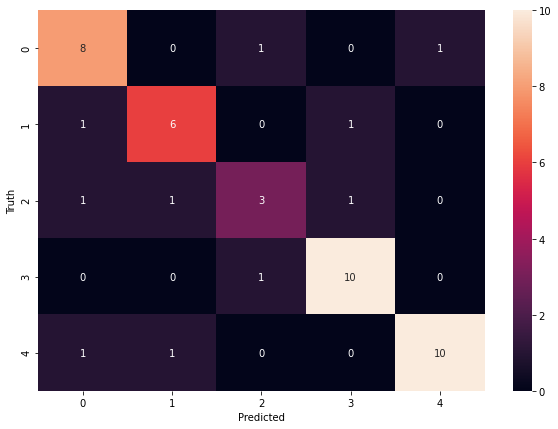

In [107]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [64]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'muhammad_salah': 2,
 'rone_coleman': 3,
 'The_rock': 4}

In [72]:
##Save the trained model
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model2.pkl') 

['saved_model2.pkl']

In [73]:
##Save class dictionary
import json
with open("class_dictionary2.json","w") as f:
    f.write(json.dumps(class_dict))